# Student Activity Analysis and Grade Prediction<br>
<br>
Yash Singh Pathania 
24204265
-  notebook analyzes student activity data from a Virtual Learning Environment (VLE) to characterize student behavior and predict academic performance.

## Task 1: Data Characterisation
### Exploring The Dataset

## Import Necessary Files 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## stting standard plotting parameters
sns.set(style="whitegrid")
plt.style.use('ggplot')

# Suppress warnings doing this so the output is clean and easy to read 
import warnings
warnings.filterwarnings('ignore')


### Loading and Initial Inspection of the Dataset

### Preliminary 
#### Display the first few rows of each dataset

In [2]:
vle_log = pd.read_csv('vle/vle_log.csv', parse_dates=['date'])
vle_grades = pd.read_csv('vle/vle_grades.csv')
print("VLE Log Data:")
print(vle_log.head())
print("\nVLE Grades Data:")
print(vle_grades.head())

VLE Log Data:
        date  student_id               activity
0 2024-09-09       22149           module_visit
1 2024-09-09       22149            topic_visit
2 2024-09-09       22149            topic_visit
3 2024-09-09       22149  lab_material_download
4 2024-09-11       22149           module_visit

VLE Grades Data:
   student_id  final_grade
0       22002  distinction
1       22003         fail
2       22005         pass
3       22009        merit
4       22012         pass


Examine the structure of the datasets

In [3]:
print("VLE Log Dataset Structure:")
print(f"Number of rows: {vle_log.shape[0]}")
print(f"Number of columns: {vle_log.shape[1]}")
print("\nColumn data types:")
print(vle_log.dtypes)

VLE Log Dataset Structure:
Number of rows: 33633
Number of columns: 3

Column data types:
date          datetime64[ns]
student_id             int64
activity              object
dtype: object


In [4]:
print("\nVLE Grades Dataset Structure:")
print(f"Number of rows: {vle_grades.shape[0]}")
print(f"Number of columns: {vle_grades.shape[1]}")
print("\nColumn data types:")
print(vle_grades.dtypes)


VLE Grades Dataset Structure:
Number of rows: 300
Number of columns: 2

Column data types:
student_id      int64
final_grade    object
dtype: object


Check for missing values

In [5]:
print("Missing values in VLE Log:")
print(vle_log.isnull().sum())

Missing values in VLE Log:
date          0
student_id    0
activity      0
dtype: int64


### This is a function that i will us throughout the notebook to convert the tags into more readable camel case so its a helper functiion 

In [6]:
def format_activity_name(activity_name):
    """Convert snake_case activity names to Title Case with spaces for better readability."""
    return ' '.join(word.capitalize() for word in activity_name.split('_'))

In [7]:
print("\nMissing values in VLE Grades:")
print(vle_grades.isnull().sum())


Missing values in VLE Grades:
student_id     0
final_grade    0
dtype: int64


## 1b Basic Summary Statistics

Get summary of student activities

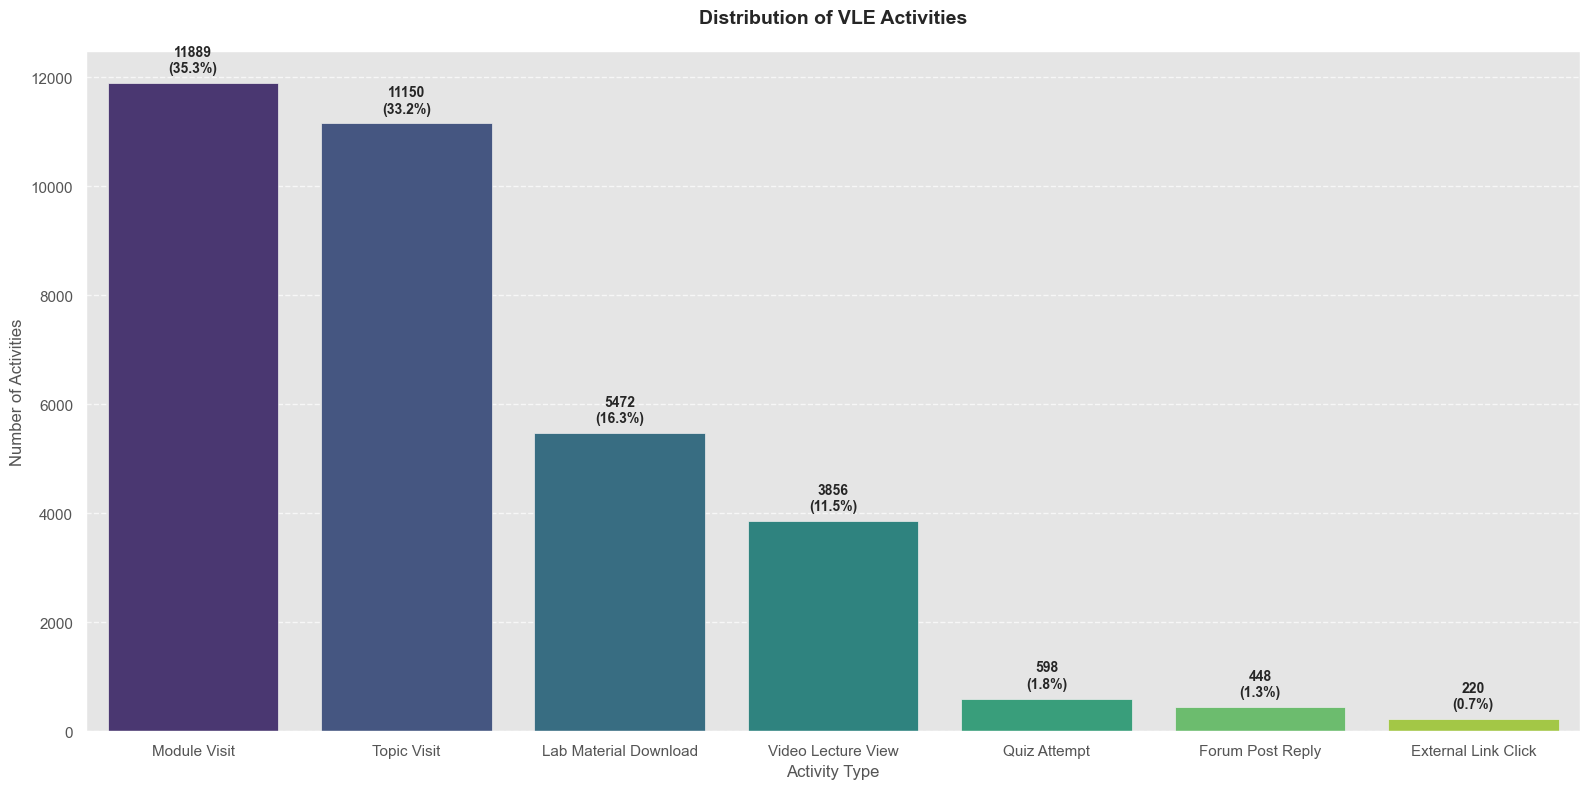

In [8]:
# Count the number of each activity type (needed for the bar chart)
activity_counts = vle_log['activity'].value_counts()

# Create formatted labels for visualization
formatted_activities = {activity: format_activity_name(activity) for activity in activity_counts.index}

# Sort activities by count for better visualization
sorted_counts = activity_counts.sort_values(ascending=False)

# Create a bar chart
plt.figure(figsize=(16, 8))  # Made wider
colors = sns.color_palette("viridis", len(sorted_counts))

# Create vertical bar chart with formatted activities on x-axis
ax = sns.barplot(x=sorted_counts.index, y=sorted_counts.values, palette=colors)

# Add value labels on top of the bars
for i, v in enumerate(sorted_counts.values):
    ax.text(i, v + 200, f"{v}\n({sorted_counts.values[i]/activity_counts.sum()*100:.1f}%)", 
            ha='center', fontweight='bold')

# Format x-tick labels - removed rotation
plt.xticks(range(len(sorted_counts)), [formatted_activities[activity] for activity in sorted_counts.index], 
           rotation=0, ha='center')

# Add styling
plt.title('Distribution of VLE Activities', fontsize=14, fontweight='bold', pad=20)
plt.ylabel('Number of Activities', fontsize=12)
plt.xlabel('Activity Type', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

activity_percentage = activity_counts / activity_counts.sum() * 100

plt.tight_layout()
plt.savefig('activity_distribution_bar.png', bbox_inches='tight')
plt.show()
plt.close()



1. **Resource Access Pattern:**
   - Lab Material Downloads (16.3%) and Video Lecture Views (11.5%) together make up about 28% of activities
   - This shows a healthy engagement with actual learning materials
   - Particularly interesting is that students download lab materials more frequently than they watch video lectures, suggesting a preference for hands-on, practical learning materials over passive video content
   - This could inform future course design decisions about the balance between practical materials and video content

2. **Limited External Exploration:**
   - External Link Clicks are remarkably low at just 0.7% (220 clicks)
   - This could indicate either:
     - Students find the course content comprehensive enough that they don't need additional resources
     - OR (more concerning) students might not be exploring supplementary materials and broader context
   - This insight could suggest a need to better integrate external resources into the core course material or make them more appealing/relevant to students

Also we can adress module visit and topic visit to be recurring while giving quizes is a one time affair

Get summary of student grades

Grade Distribution:


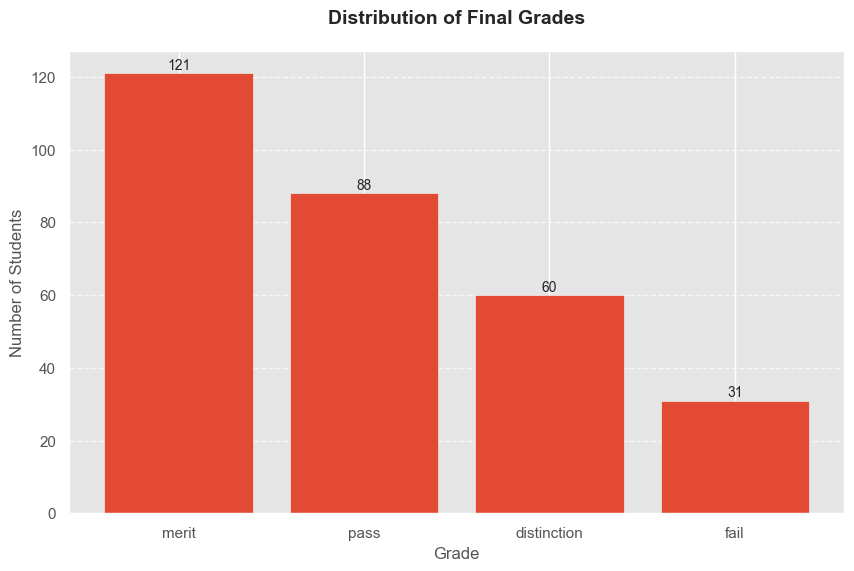

In [9]:
print("Grade Distribution:")
grade_counts = vle_grades['final_grade'].value_counts()
grade_counts

# Create a bar chart for grade distribution
plt.figure(figsize=(10, 6))
plt.bar(grade_counts.index, grade_counts.values)
plt.title('Distribution of Final Grades', fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Grade', fontsize=12)
plt.ylabel('Number of Students', fontsize=12)
# Add value labels on top of bars
for i, v in enumerate(grade_counts.values):
    plt.text(i, v + 1, str(v), ha='center')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('grade_distribution_bar.png', bbox_inches='tight')
plt.show()
plt.close()

In [10]:
# Number of unique students in each dataset: 
print(f"\nNumber of unique students in log data: {vle_log['student_id'].nunique()}")
print(f"Number of students in grades data: {vle_grades['student_id'].nunique()}")



Number of unique students in log data: 300
Number of students in grades data: 300


#### This is imporptant because we would not want them to be any mismatch between the dataset


## Activites And their Corelation To Days Of The Week

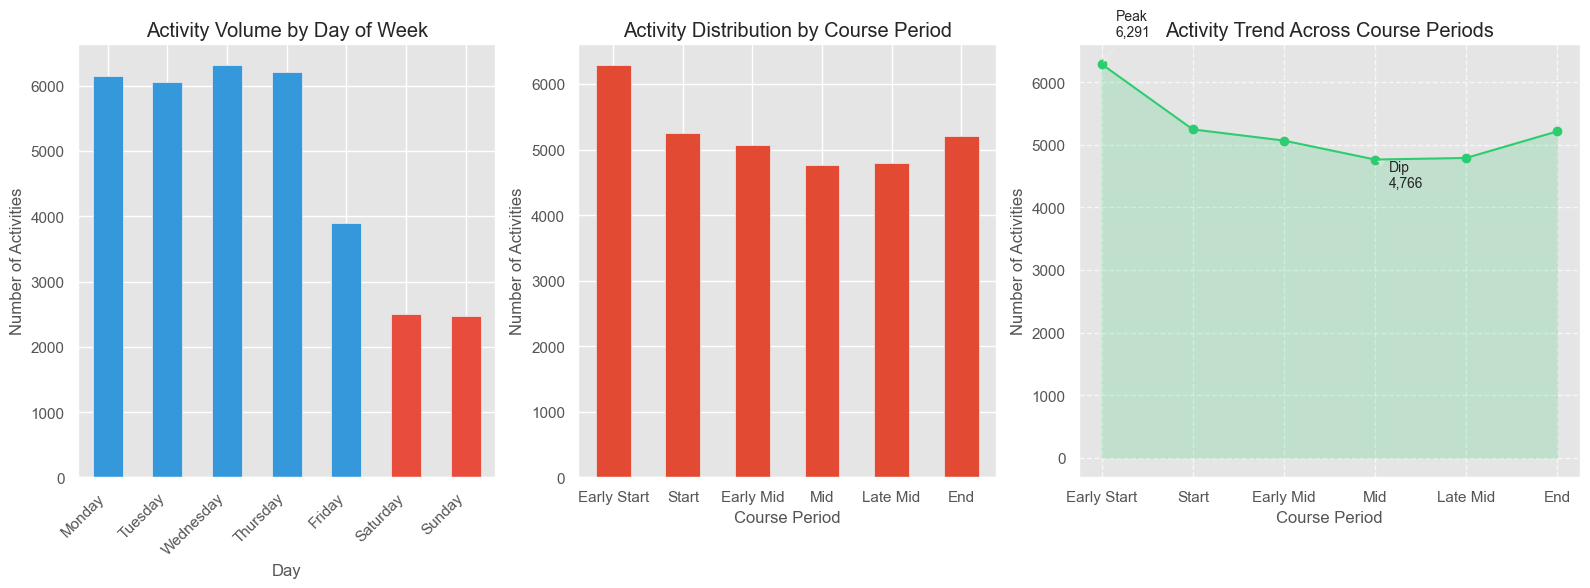


Key Insights:
Most active day: Wednesday (6318 activities)
Least active day: Sunday (2475 activities)

Period Analysis:
Peak activity period: Early Start (6,291 activities)
Lowest activity period: Mid (4,766 activities)

Weekday vs Weekend activity:
Weekday average: 5730 activities
Weekend average: 2491 activities


In [11]:
# Convert date to datetime
vle_log['date'] = pd.to_datetime(vle_log['date'])

# Get date range info
min_date = vle_log['date'].min()
max_date = vle_log['date'].max()
total_days = (max_date - min_date).days + 1

# Create more precise time periods
period_length = total_days // 6
period_dates = [min_date + pd.Timedelta(days=i * period_length) for i in range(7)]
period_labels = ['Early Start', 'Start', 'Early Mid', 'Mid', 'Late Mid', 'End']
vle_log['period'] = pd.cut(vle_log['date'], bins=period_dates, labels=period_labels)

vle_log['day_of_week'] = vle_log['date'].dt.strftime('%A')
vle_log['is_weekend'] = vle_log['day_of_week'].isin(['Saturday', 'Sunday'])

fig = plt.figure(figsize=(16, 6))
fig.subplots_adjust(bottom=0.20)   # give more room for x‑labels
gs = fig.add_gridspec(1, 3, width_ratios=[1, 1, 1.2])

# 1. Activity by Day of Week doing this to see weekedn pattern
ax1 = fig.add_subplot(gs[0, 0])
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_activity = vle_log.groupby('day_of_week').size().reindex(days_order)
colors = ['#3498db' if d not in ['Saturday','Sunday'] else '#e74c3c' for d in days_order]
daily_activity.plot(kind='bar', ax=ax1, color=colors)
ax1.set_title('Activity Volume by Day of Week')
ax1.set_xlabel('Day')
ax1.set_ylabel('Number of Activities')
ax1.tick_params(axis='x', rotation=45)   # rotate labels
# explicitly set horizontal alignment of tick labels
for lbl in ax1.get_xticklabels():
    lbl.set_ha('right')

# 2. Engagement by Course Period (Bar) genral course activity
ax2 = fig.add_subplot(gs[0, 1])
period_activity = vle_log.groupby('period').size()
period_activity.plot(kind='bar', ax=ax2)
ax2.set_title('Activity Distribution by Course Period')
ax2.set_xlabel('Course Period')
ax2.set_ylabel('Number of Activities')
ax2.tick_params(axis='x', rotation=0)

# 3. Period Activity Trend (Line) see dips and curves
ax3 = fig.add_subplot(gs[0, 2])
period_activity.plot(kind='line', marker='o', ax=ax3, color='#2ecc71')
ax3.fill_between(range(len(period_activity)), period_activity.values, alpha=0.2, color='#2ecc71')
ax3.set_title('Activity Trend Across Course Periods')
ax3.set_xlabel('Course Period')
ax3.set_ylabel('Number of Activities')
ax3.tick_params(axis='x', rotation=0)
ax3.grid(True, linestyle='--', alpha=0.7)

peak_period = period_activity.idxmax(); peak_value = period_activity.max()
dip_period = period_activity.idxmin(); dip_value = period_activity.min()
ax3.annotate(f'Peak\n{peak_value:,.0f}', xy=(period_labels.index(peak_period), peak_value),
             xytext=(10, 20), textcoords='offset points', arrowprops=dict(arrowstyle='->'))
ax3.annotate(f'Dip\n{dip_value:,.0f}', xy=(period_labels.index(dip_period), dip_value),
             xytext=(10, -20), textcoords='offset points', arrowprops=dict(arrowstyle='->'))

plt.tight_layout()
plt.savefig('figures/student_engagement_detailed_analysis.png', bbox_inches='tight')
plt.show()
plt.close()

# Print key insights
print("\nKey Insights:")
print(f"Most active day: {daily_activity.idxmax()} ({daily_activity.max()} activities)")
print(f"Least active day: {daily_activity.idxmin()} ({daily_activity.min()} activities)")
print("\nPeriod Analysis:")
print(f"Peak activity period: {peak_period} ({peak_value:,.0f} activities)")
print(f"Lowest activity period: {dip_period} ({dip_value:,.0f} activities)")
print("\nWeekday vs Weekend activity:")
print(f"Weekday average: {vle_log[~vle_log['is_weekend']].groupby('day_of_week').size().mean():.0f} activities")
print(f"Weekend average: {vle_log[vle_log['is_weekend']].groupby('day_of_week').size().mean():.0f} activities")


### Insights

1. **Weekly Activity Pattern (Left Graph):**
   - Strong weekday bias: Monday through Thursday show consistently high activity (around 6,000 activities per day)
   - Sharp decline on weekends: Activity drops by more than 50% on Saturday and Sunday (around 2,500 activities)
   - Wednesday shows the highest activity level, suggesting it might be a key day for course deliverables or scheduled activities
   - This pattern strongly indicates that students treat the course as part of their regular "work week" schedule

2. **Course Period Distribution (Middle Graph):**
   - "Early Start" shows the highest activity level, indicating strong initial engagement
   - Gradual decline through the middle periods, which is typical of most courses (student enthusiasm tends to wane personal experience)
   - Interesting uptick at the "End" period, likely due to:
     - Final assessments/examinations
     - Last-minute catching up on course materials
     - Revision activities

3. **Activity Trend (Right Graph):**
   - Clear downward trend from course start to mid-point (from ~6,000 to ~4,766 activities)
   - Stabilization in the later periods
   - Slight upward trend at the end, confirming the observation from the middle graph
   - The dip in the middle periods could be a potential area for intervention to maintain student engagement

These patterns could be valuable for:
- Scheduling important course activities (focusing on peak engagement days)
- Planning interventions to boost weekend participation if desired
- Designing strategies to maintain engagement during the middle periods of the course
- Timing support resources to align with natural student activity patterns


### Visualize Grade Distribution

Calculate and display percentage distribution

Grade Percentage Distribution:
merit: 40.33%
pass: 29.33%
distinction: 20.00%
fail: 10.33%


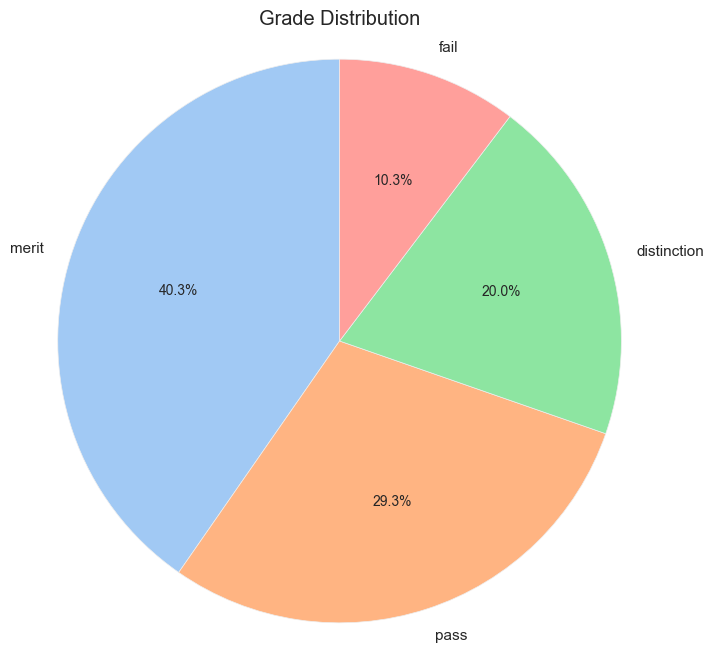

In [12]:
## Note this seemed like a good spot to use a pie chart even though it is not the best way to visualize this data

grade_percentage = grade_counts / grade_counts.sum() * 100
print("Grade Percentage Distribution:")
for grade, percentage in grade_percentage.items():
    print(f"{grade}: {percentage:.2f}%")

# Create a pie chart of grade distribution
plt.figure(figsize=(8, 8))
plt.pie(grade_percentage, labels=grade_percentage.index, autopct='%1.1f%%', 
    startangle=90, colors=sns.color_palette("pastel"))
plt.title('Grade Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.savefig('grade_distribution_pie.png')
plt.show()
plt.close()

### Some other interpretation

Dates with the most quiz attempts:
date
2024-09-09    16
2024-11-27    16
2024-11-11    15
2024-11-28    15
2024-09-10    14
2024-11-26    13
2024-11-13    13
2024-11-18    13
2024-09-23    12
2024-09-16    11
dtype: int64


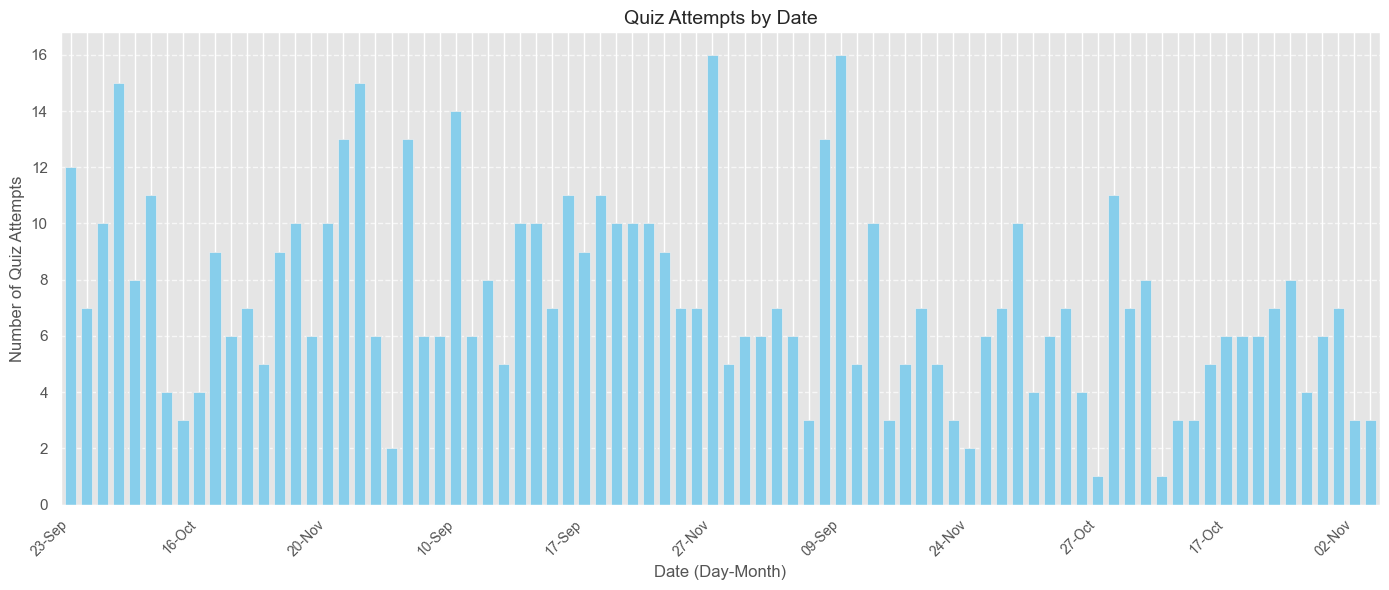

In [13]:
# Analyze quiz attempt patterns to identify when quizzes are taken

# Extract quiz attempt data
quiz_attempts = vle_log[vle_log['activity'] == 'quiz_attempt'].copy()

# Convert date format to show only day and month
quiz_attempts['date_formatted'] = quiz_attempts['date'].dt.strftime('%d-%b')

# Count quiz attempts by date
quiz_dates = quiz_attempts.groupby('date').size().sort_values(ascending=False)

print("Dates with the most quiz attempts:")
print(quiz_dates.head(10))

# Visualize quiz attempts over time with improved readability
plt.figure(figsize=(14, 6))
quiz_attempts_by_date = quiz_attempts.groupby('date_formatted').size()

# Sort dates chronologically for better interpretation
quiz_attempts_by_date = quiz_attempts_by_date.reindex(
    pd.to_datetime(quiz_attempts['date'].dt.strftime('%Y-%m-%d')).dt.strftime('%d-%b').unique()
)

# Create bar plot with improved spacing
ax = quiz_attempts_by_date.plot(kind='bar', color='skyblue', width=0.7)
plt.title('Quiz Attempts by Date', fontsize=14)
plt.xlabel('Date (Day-Month)', fontsize=12)
plt.ylabel('Number of Quiz Attempts', fontsize=12)

# Improve x-axis readability
plt.xticks(rotation=45, ha='right', fontsize=10)

# Only show a subset of x-tick labels if there are too many
if len(quiz_attempts_by_date) > 15:
    # Show every nth label to avoid overcrowding
    n = max(1, len(quiz_attempts_by_date) // 10)
    for idx, label in enumerate(ax.xaxis.get_ticklabels()):
        if idx % n != 0:
            label.set_visible(False)

# Add grid lines for better readability of values
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig('quiz_attempts_by_date.png')
plt.show()
plt.close()


###  this is just a fun insight that i wanted to explore to see that if the dates of quizes are just on the same date we uld maybe corelate to the students being in the same class because they could have the quiz together but that is not neccesarily true here maybe they are alowed some buffer period to give the quiz 

### Is the grades a normal distribution bell curve ? 

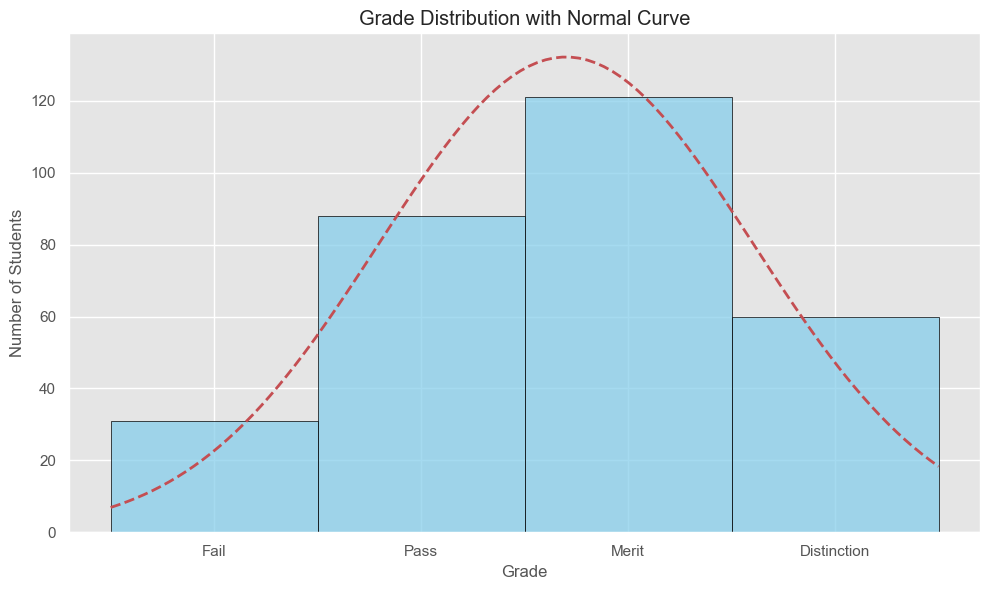

In [14]:
from scipy.stats import norm

# Map final grades to numeric values
grade_numeric = vle_grades['final_grade'].map({
    'fail': 1,
    'pass': 2,
    'merit': 3,
    'distinction': 4
})

# Plot histogram of grade counts
plt.figure(figsize=(10, 6))
sns.histplot(
    grade_numeric,
    bins=[0.5, 1.5, 2.5, 3.5, 4.5],
    stat='count',
    color='skyblue',
    edgecolor='black'
)

# Fit and overlay a normal distribution curve
mu, sigma = grade_numeric.mean(), grade_numeric.std()
x = np.linspace(0.5, 4.5, 100)
bin_width = 1
pdf_scaled = norm.pdf(x, mu, sigma) * len(grade_numeric) * bin_width
plt.plot(x, pdf_scaled, 'r--', linewidth=2)

# Final formatting
plt.title('Grade Distribution with Normal Curve')
plt.xlabel('Grade')
plt.ylabel('Number of Students')
plt.xticks([1, 2, 3, 4], ['Fail', 'Pass', 'Merit', 'Distinction'])
plt.tight_layout()
plt.show()

#### Cant tell for sure if i had marks would be able to tell better but it does look like its somewhere there. 

## Task 2: ABT Creation

### Feature Engineering<br>
<br>
Now we'll combine the activity log data into an Analytics Base Table (ABT) with features that might be predictive of student performance.

In [15]:
student_features = {}
# 1. Total activities per student
total_activities = vle_log.groupby('student_id').size()
student_features['total_activities'] = total_activities

# 2. Frequency of different activity types
activity_types = vle_log.groupby(['student_id', 'activity']).size().unstack(fill_value=0)
student_features.update(activity_types)

## 3. Active days count (engagement duration)

active_days = vle_log.groupby('student_id')['date'].nunique()
student_features['active_days'] = active_days

# 4. Activity consistency (standard deviation of days between activities)

consistency = []
for student in vle_log['student_id'].unique():
    student_data = vle_log[vle_log['student_id'] == student]
    if len(student_data) <= 1:
        consistency.append((student, 0))
    else:
        # Sort by date and calculate days between consecutive activities
        student_data = student_data.sort_values('date')
        days_diff = student_data['date'].diff().dt.days.dropna()
        if len(days_diff) == 0:
            consistency.append((student, 0))
        else:
            # Lower std dev means more consistent participation
            consistency.append((student, days_diff.std()))

consistency_df = pd.DataFrame(consistency, columns=['student_id', 'activity_consistency'])
consistency_df.set_index('student_id', inplace=True)
student_features['activity_consistency'] = consistency_df['activity_consistency']

Temporal features - activity in first half vs second half of course

In [16]:
mid_date = min_date + (max_date - min_date) / 2
first_half = vle_log[vle_log['date'] <= mid_date].groupby('student_id').size()
second_half = vle_log[vle_log['date'] > mid_date].groupby('student_id').size()

student_features['first_half_activities'] = first_half.reindex(total_activities.index, fill_value=0)
student_features['second_half_activities'] = second_half.reindex(total_activities.index, fill_value=0)

### Feature Exploration

Plot the correlation matrix

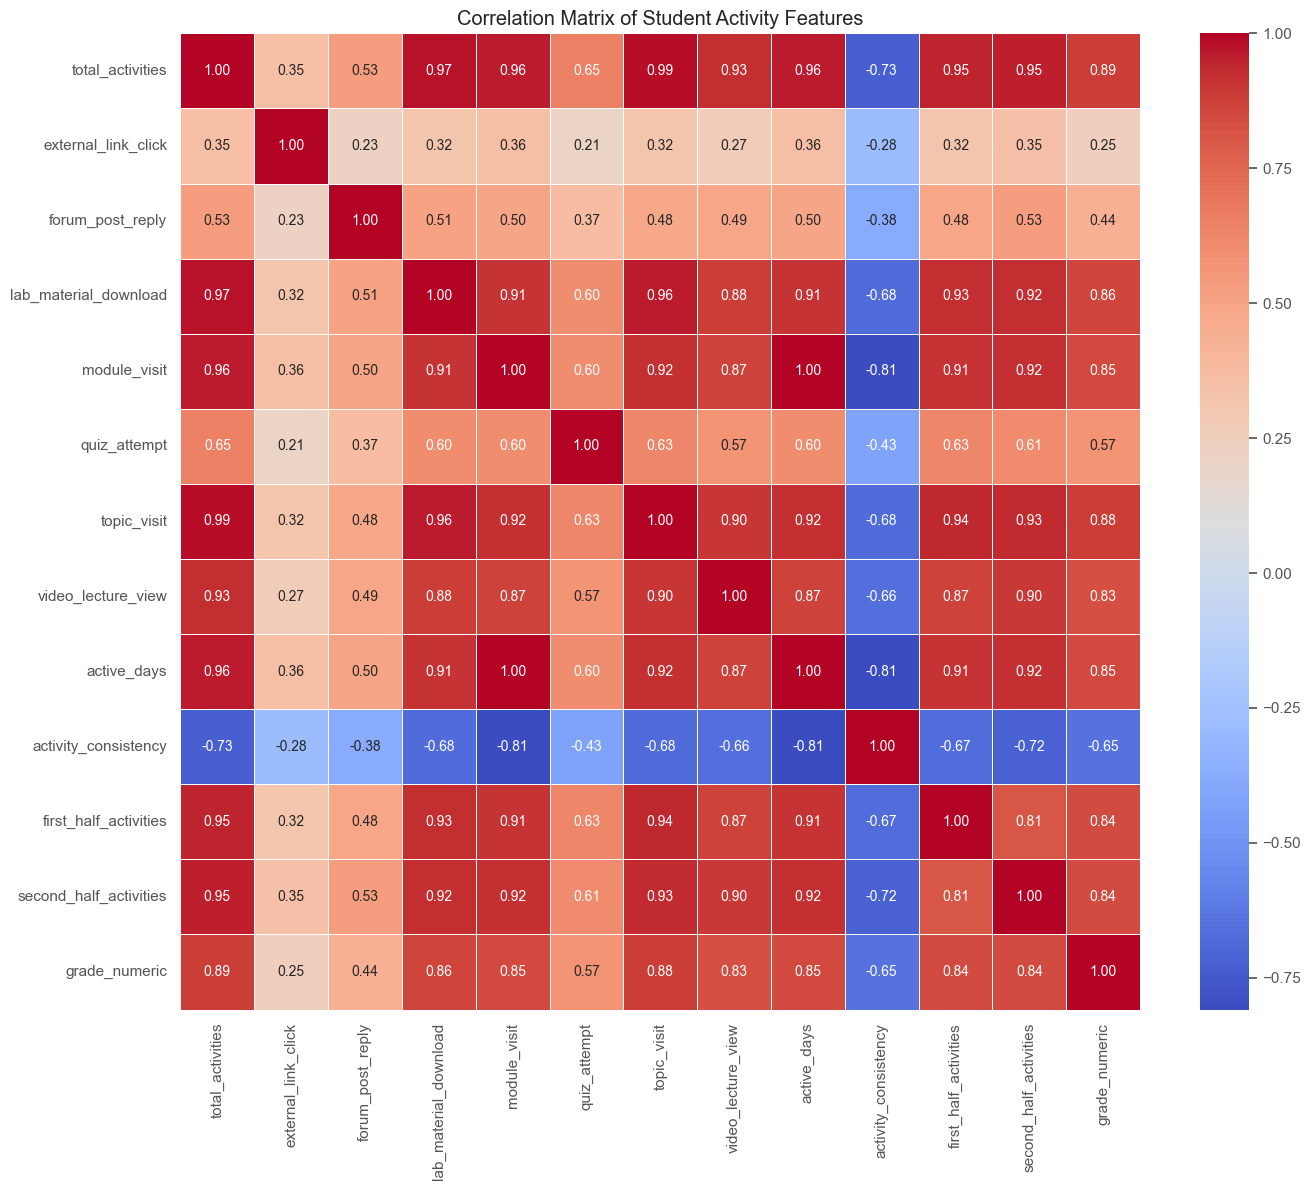

In [31]:
# Create the Analytics Base Table (abt) from student_features
abt = pd.DataFrame(student_features)

# Add the final grade information to the abt
abt['final_grade'] = vle_grades.set_index('student_id')['final_grade']

# Map grades to numeric values for correlation analysis
grade_mapping = {'distinction': 4, 'merit': 3, 'pass': 2, 'fail': 1}
abt['grade_numeric'] = abt['final_grade'].map(grade_mapping)

# Select only numeric columns for correlation matrix
numeric_cols = abt.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = abt[numeric_cols].corr()

# Create heatmap visualization
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Student Activity Features')
plt.tight_layout()
plt.savefig('correlation_matrix.png')
plt.show()
plt.close()

## Corelation Matrix - interpretation,

1.  **Strong Positive Correlation with Grades**:
    *   Many base activity features show strong positive correlations (dark red) with `grade_numeric` (final grade), indicating higher activity generally leads to better grades.
    *   **Top Correlators**: `total_activities` (0.89), `topic_visit` (0.88), `active_days` (0.85), `module_visit` (0.85), `lab_material_download` (0.86), `video_lecture_view` (0.83), `first_half_activities` (0.84), and `second_half_activities` (0.84). This suggests overall engagement, consistent access throughout the course, and interaction with core content are highly predictive of success.
    *   **Derived Features**: `lecture_engagement_ratio` (0.68) and `quiz_engagement_ratio` (0.50) also show moderate positive correlations, suggesting not just quantity but also the *type* of engagement relative to navigation matters.

2.  **Strong Negative Correlation with Grades**:
    *   **`activity_consistency`** shows a strong negative correlation (-0.65) with `grade_numeric`. Since a *lower* score on consistency (standard deviation of days between activities) means *more* consistent participation, this negative correlation actually reinforces that **consistent, regular engagement is strongly associated with better grades**.

3.  **High Inter-Feature Correlations (Multicollinearity)**:
    *   There are very high positive correlations between many base activity counts (e.g., `total_activities` with `topic_visit` (0.99), `active_days` (0.96), `module_visit` (0.96), `lab_material_download` (0.97)). This indicates these features measure similar aspects of overall student activity volume. This is important for modeling, as using all of them might be redundant.
    *   `first_half_activities` and `second_half_activities` are highly correlated with each other (0.84) and with total activities/visits, suggesting students active early tend to stay active.

4.  **Activity Consistency Correlations**:
    *   `activity_consistency` is strongly negatively correlated with most activity counts (e.g., -0.73 with `total_activities`, -0.81 with `active_days`, -0.81 with `module_visit`). This makes sense – students who are active more often and on more days tend to have more regular (less variable) intervals between activities.

5.  **Derived Feature Correlations**:
    *   `lecture_engagement_ratio` is moderately correlated with `video_lecture_view` (0.73) but less so with `module_visit` (0.66), indicating it captures a different aspect than just raw counts.
    *   `forum_participation_ratio` has a strong correlation (0.89) with `forum_post_reply`, as expected, but weak correlations with most other activity types.

6.  **Weaker Correlations with Grade**:
    *   `external_link_click` (0.25), `forum_post_reply` (0.44), and `forum_participation_ratio` (0.24) show weaker correlations with grades compared to core content interactions.
    *   `activity_trajectory` (0.22) has a relatively weak positive correlation, suggesting simply increasing activity later in the course isn't as strongly linked to success as overall high engagement or consistency.

**Key Takeaways:**

*   **Volume & Consistency are Key**: High overall activity volume (`total_activities`, visits, active days) and consistent participation (`activity_consistency`) are the strongest predictors of student success.
*   **Core Content Interaction**: Engaging with primary learning materials (topic/module visits, video views, lab downloads) is crucial.
*   **Redundancy**: Many base activity count features are highly correlated, suggesting potential for feature selection or dimensionality reduction in modeling.
*   **Limited Impact of Peripheral Activities**: Forum use and external link clicks appear less critical for predicting grades in this dataset compared to core VLE interactions.
*   **Derived Ratios Add Value**: While raw counts are powerful, derived ratios like lecture/quiz engagement provide additional, moderately predictive information about engagement quality.


First Few Rows of Analytics Base Table:
            Total Activities  External Link Click  Forum Post Reply  Lab Material Download  Module Visit  Quiz Attempt  Topic Visit  Video Lecture View  Active Days  Activity Consistency  First Half Activities  Second Half Activities  final_grade  Grade Numeric
student_id                                                                                                                                                                                                                                                           
22002                    169                    0                 3                     29            47             2           65                  23           47              1.008783                     83                      86  distinction              4
22003                     65                    0                 0                     13            22             0           22                   8           22          

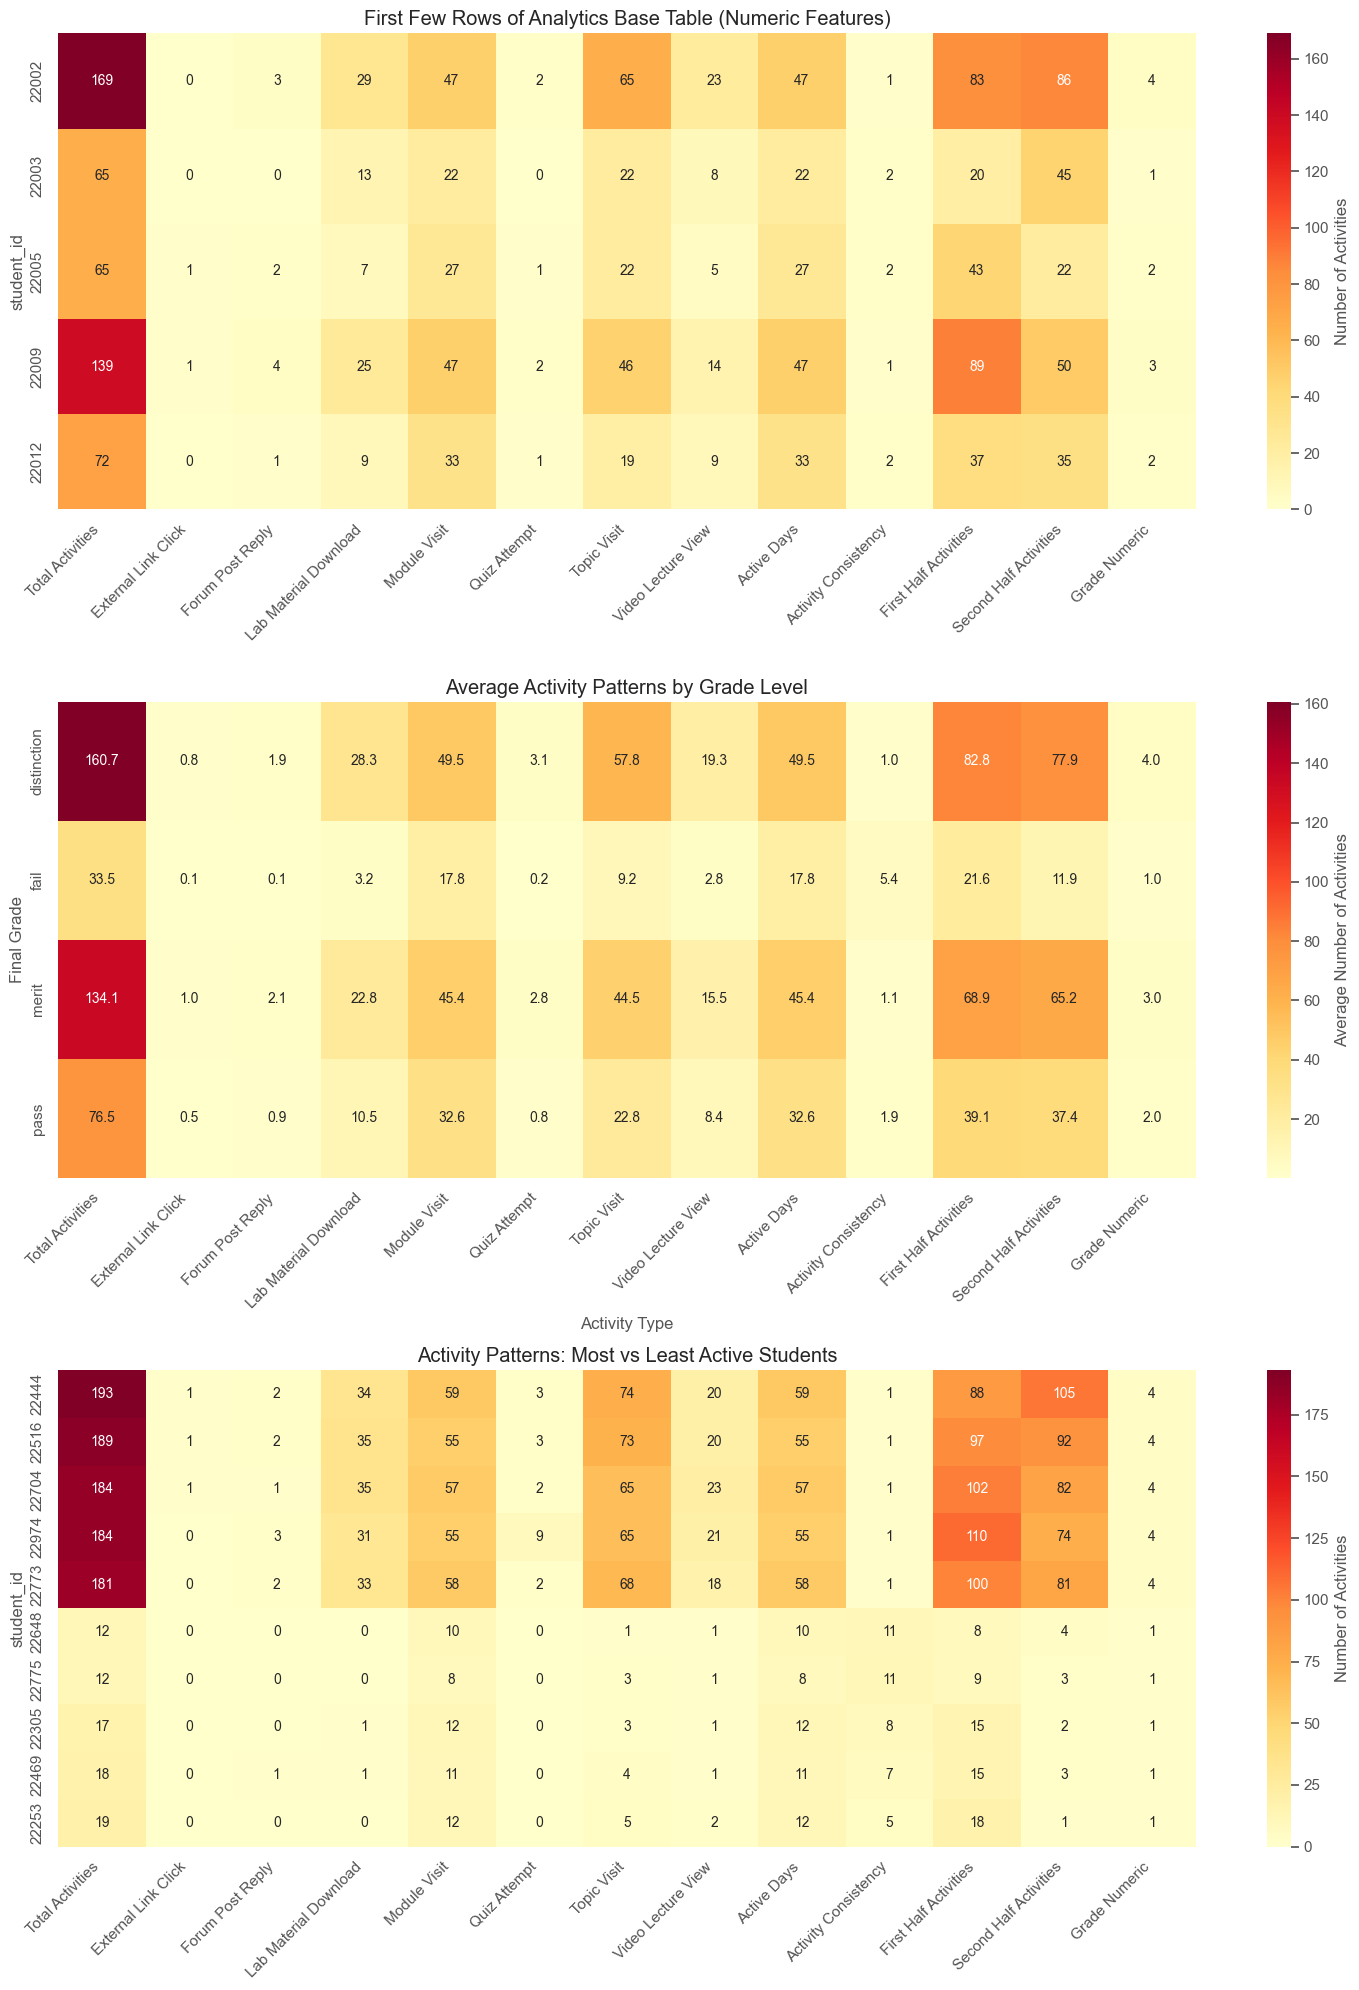

In [ ]:
# First print the ABT head with formatted columns
print("First Few Rows of Analytics Base Table:")
# Format column names for display
display_abt = abt.copy()
display_abt.columns = [format_activity_name(col) if col in numeric_cols else col for col in abt.columns]
print(display_abt.head().to_string())
print("\n")

# Create a figure with subplots for all three visualizations
fig, axes = plt.subplots(3, 1, figsize=(15, 20))

# 1. First few rows heatmap
sns.heatmap(abt[numeric_cols].head(), 
            cmap='YlOrRd',
            annot=True,
            fmt='.0f',
            cbar_kws={'label': 'Number of Activities'},
            ax=axes[0])
axes[0].set_title('First Few Rows of Analytics Base Table (Numeric Features)')
axes[0].set_xticklabels([format_activity_name(col) for col in numeric_cols], rotation=45, ha='right')

# 2. Grade-grouped averages
grade_grouped = abt.groupby('final_grade')[numeric_cols].mean()
sns.heatmap(grade_grouped, 
            cmap='YlOrRd',
            annot=True,
            fmt='.1f',
            cbar_kws={'label': 'Average Number of Activities'},
            ax=axes[1])
axes[1].set_title('Average Activity Patterns by Grade Level')
axes[1].set_xlabel('Activity Type')
axes[1].set_ylabel('Final Grade')
axes[1].set_xticklabels([format_activity_name(col) for col in numeric_cols], rotation=45, ha='right')

# 3. Top and bottom students comparison
top_students = abt.nlargest(5, 'total_activities')
bottom_students = abt.nsmallest(5, 'total_activities')
selected_students = pd.concat([top_students, bottom_students])
sns.heatmap(selected_students[numeric_cols],
            cmap='YlOrRd',
            annot=True,
            fmt='.0f',
            cbar_kws={'label': 'Number of Activities'},
            ax=axes[2])
axes[2].set_title('Activity Patterns: Most vs Least Active Students')
axes[2].set_xticklabels([format_activity_name(col) for col in numeric_cols], rotation=45, ha='right')

plt.tight_layout()
plt.savefig('figs/abt_analysis.png')
plt.show()


1.  **First Few Rows Analysis (Top Heatmap)**:
    *   **Individual Variation**: Clearly shows how different students engage differently. Student 22002 has high total activity (169) and relatively high engagement ratios (Lecture Engagement Ratio: 0.49), while student 22003 has lower activity (65) and zero quiz/forum engagement.
    *   **Base vs. Derived**: Allows comparison of raw counts (e.g., Module Visit: 47 for 22002) with derived ratios (e.g., Quiz Engagement Ratio: 0.04 for 22002). This highlights that high activity doesn't always mean proportional engagement in *all* types of activities.
    *   **Low Interactive Ratios**: The derived ratios for quizzes, lectures (relative to module visits), and especially forum participation are generally low across these initial students, even for those with high total activity.

2.  **Average Activity Patterns by Grade Level (Middle Heatmap)**:
    *   **Strong Grade Correlation**: Confirms the trend seen with base features – higher grades correlate with higher average values across almost all features, including derived ratios like Lecture Engagement Ratio (0.4 for distinction vs 0.1 for fail).
    *   **Activity Consistency**: Lower (better) consistency scores are associated with higher grades (1.0 for distinction vs 5.4 for fail).
    *   **Derived Feature Insights**:
        *   **Lecture Engagement Ratio**: Higher grades tend to view more lectures relative to their module visits.
        *   **Quiz Engagement Ratio**: Shows a slight increase with grade, but remains low overall.
        *   **Forum Participation Ratio**: Remains near zero across all grades, reinforcing the finding of low forum use.
    *   **Temporal Pattern**: Higher-performing students (Distinction, Merit) show significantly more activity in both the first and second halves compared to lower-performing students.

3.  **Activity Patterns: Most vs Least Active Students (Bottom Heatmap)**:
    *   **Engagement Extremes**: Stark contrast between the top 5 and bottom 5 students across *all* features.
    *   **Top Students**: High raw counts translate into generally higher (though still relatively low for some activities) derived ratios compared to the bottom group. They maintain strong engagement in both halves of the course. Their Activity Consistency is very low (around 1), indicating regular participation.
    *   **Bottom Students**: Minimal activity across the board. Derived ratios are near zero. Their Activity Consistency is much higher (5-11), suggesting infrequent, sporadic interactions.
    *   **Ratio Differences**: Even among the most active students, the Forum Participation Ratio is effectively zero, while Lecture and Quiz Engagement Ratios are modest. This suggests quantity (total activities) doesn't perfectly align with engagement *quality* (ratios) for all activity types.

**Key Overall Insights (Including Derived Features):**

1.  **Quantity & Quality Matter**: Both high total activity (base features) and better engagement ratios (derived features, like lecture engagement) are associated with higher grades.
2.  **Consistency is Key**: Lower activity consistency (more regular participation) strongly correlates with better performance.
3.  **Interaction Gap**: Interactive features (quizzes, forums, external links) show low participation rates *and* low engagement ratios relative to other activities, even for top students.
4.  **Derived Features Add Nuance**: Ratios help differentiate engagement styles. For example, two students might have similar module visits, but different lecture engagement ratios, indicating different learning approaches.
5.  **Temporal Engagement**: Successful students generally show high and sustained engagement throughout the course (high first and second-half activities).


Display correlations with the target variable (grade_numeric)

In [22]:
print("Correlations with final grade (sorted by strength):")
grade_correlations = correlation_matrix['grade_numeric'].drop('grade_numeric').sort_values(ascending=False)
print(grade_correlations)

Correlations with final grade (sorted by strength):


NameError: name 'correlation_matrix' is not defined


1.  **Top Predictors (Strong Positive Correlation > 0.80)**:
    *   `total_activities` (0.89), `topic_visit` (0.88), `lab_material_download` (0.86), `module_visit` (0.85), `active_days` (0.85), `second_half_activities` (0.84), `first_half_activities` (0.84), `video_lecture_view` (0.83).
    *    These features are very strongly linked to higher grades. Success is highly correlated with overall activity volume, interaction with core content (topics, labs, modules, videos), the number of days active, and sustained engagement throughout the course.

2.  **Strong Negative Correlation**:
    *   `activity_consistency` (-0.65).
    *   This is a strong predictor, but in the negative direction. Since a *lower* score indicates *more consistent* participation (less variability in days between activities), this means **more regular, consistent engagement strongly predicts higher grades**.

3.  **Moderate Positive Correlations (0.45 - 0.70)**:
    *   `lecture_engagement_ratio` (0.68), `quiz_attempt` (0.57), `quiz_engagement_ratio` (0.50).
    *    Engaging with lectures relative to module visits and attempting quizzes show a moderate positive relationship with grades. These suggest *how* students engage, not just how much, also matters, but less strongly than overall activity or consistency.

4.  **Weaker Positive Correlations (< 0.45)**:
    *   `forum_post_reply` (0.44), `external_link_click` (0.25), `forum_participation_ratio` (0.24), `activity_trajectory` (0.22).
    *   These features have a much weaker link to grades. Forum activity, using external links, and the *change* in activity level between the first and second half (trajectory) are less predictive of the final outcome compared to core engagement metrics.

**Key Takeaways**:

*   **High Volume & Consistency Drive Success**: The most important factors are being highly active overall and participating consistently throughout the course.
*   **Core Content is Crucial**: Interaction with topics, modules, labs, and videos is significantly more correlated with success than forum activity or external link usage.
*   **Activity Ratios Add Insight**: While not as strong as raw counts, ratios like lecture/quiz engagement provide moderate predictive value.
*   **Trajectory Less Important**: Simply increasing activity later isn't as strongly linked to success as maintaining high, consistent engagement.


## Task 3: Classification & Evaluation<br>
<br>
In this task, we'll build classification models to predict student grades based on their VLE activity patterns.

Import necessary libraries for classification

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings('ignore') # ignored this for cleaners outputs 

Prepare the data for modeling<br>
Drop the numeric grade column (we created it just for correlation analysis)

In [ ]:
if 'grade_numeric' in abt.columns:
    abt = abt.drop(columns=['grade_numeric'])

Select only the numeric features for our model

In [ ]:
X = abt.select_dtypes(include=['float64', 'int64'])
y = abt['final_grade']

Split the data into training and testing sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

Standardize the features

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")
print(f"Class distribution in training set:\n{y_train.value_counts()}")
print(f"Class distribution in testing set:\n{y_test.value_counts()}")

Training data shape: (225, 12)
Testing data shape: (75, 12)
Class distribution in training set:
final_grade
merit          91
pass           66
distinction    45
fail           23
Name: count, dtype: int64
Class distribution in testing set:
final_grade
merit          30
pass           22
distinction    15
fail            8
Name: count, dtype: int64


### Model 1: Random Forest Classifier

Initialize the Random Forest model

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

Evaluate using cross-validation

In [ ]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(rf_model, X_train_scaled, y_train, cv=cv, scoring='accuracy')

In [ ]:
print(f"Random Forest Cross-Validation Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

Random Forest Cross-Validation Accuracy: 0.7911 ± 0.0573


Train the model on the full training set

In [ ]:
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

Make predictions on the test set

In [ ]:
y_pred_rf = rf_model.predict(X_test_scaled)

Evaluate the model

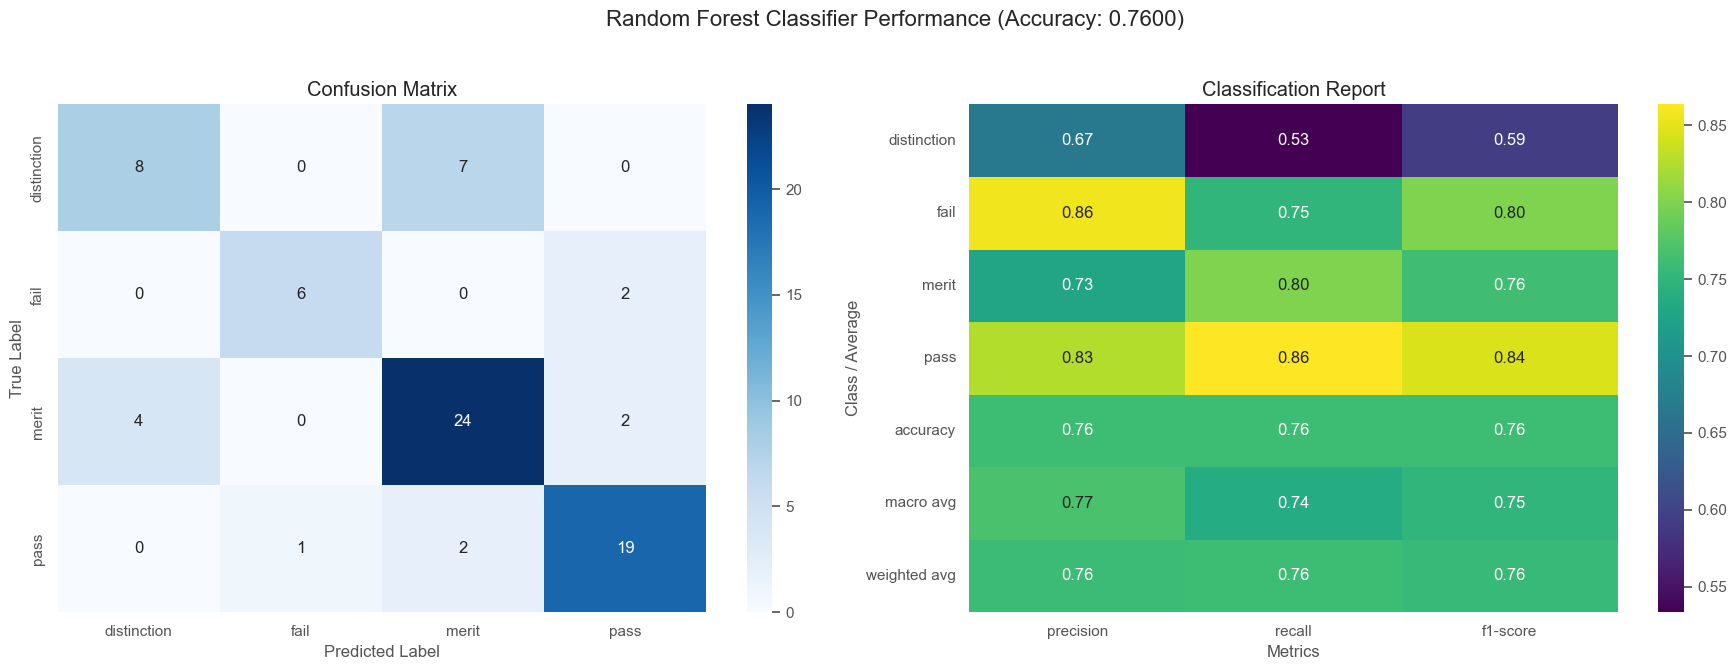

In [ ]:
# 1. Calculate Metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
cm_rf = confusion_matrix(y_test, y_pred_rf)
# Use output_dict=True to get the report as a dictionary for easier plotting
report_rf = classification_report(y_test, y_pred_rf, output_dict=True)

# Convert report to DataFrame, remove 'support' row for heatmap clarity
report_df_rf = pd.DataFrame(report_rf).iloc[:-1, :].T

# Get class labels (assuming they are in a standard order, adjust if needed)
class_labels = sorted(y_test.unique()) # e.g., ['distinction', 'fail', 'merit', 'pass']
# Or define explicitly if needed:
# class_labels = ['fail', 'pass', 'merit', 'distinction']

# 2. Create Visualizations
fig, axes = plt.subplots(1, 2, figsize=(18, 7))
fig.suptitle(f'Random Forest Classifier Performance (Accuracy: {accuracy_rf:.4f})', fontsize=16)

# Plot Confusion Matrix
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=class_labels, yticklabels=class_labels,
            annot_kws={"size": 12}) # Increase annotation font size
axes[0].set_title('Confusion Matrix')
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')

# Plot Classification Report Heatmap
sns.heatmap(report_df_rf, annot=True, cmap='viridis', fmt='.2f', ax=axes[1],
            annot_kws={"size": 12}) # Increase annotation font size
axes[1].set_title('Classification Report')
axes[1].set_xlabel('Metrics')
axes[1].set_ylabel('Class / Average')

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent title overlap
plt.savefig('figs/rf_performance_visuals.png')
plt.show()


**Key Insights:**
1. The model performs best at identifying "pass" and "merit" grades, suggesting it's most reliable for middle-range predictions.
2. There's some difficulty distinguishing between "distinction" and "merit" grades, indicating similar patterns in high-performing students.
3. The model is quite precise with "fail" predictions (0.86 precision), which is crucial for identifying at-risk students.
4. The balanced performance across macro and weighted averages (around 0.80) suggests consistent performance across classes despite class imbalance.

**Practical Implications:**
1. The model is reliable for early identification of students likely to pass or achieve merit.
2. While it may sometimes confuse exceptional performance levels, it rarely makes extreme misclassifications (e.g., between "fail" and "distinction").
3. The high precision in "fail" predictions makes it valuable for identifying students who might need additional support.
4. The model could benefit from improvements in distinguishing top-performing students (distinction category).


Feature importance

In [ ]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

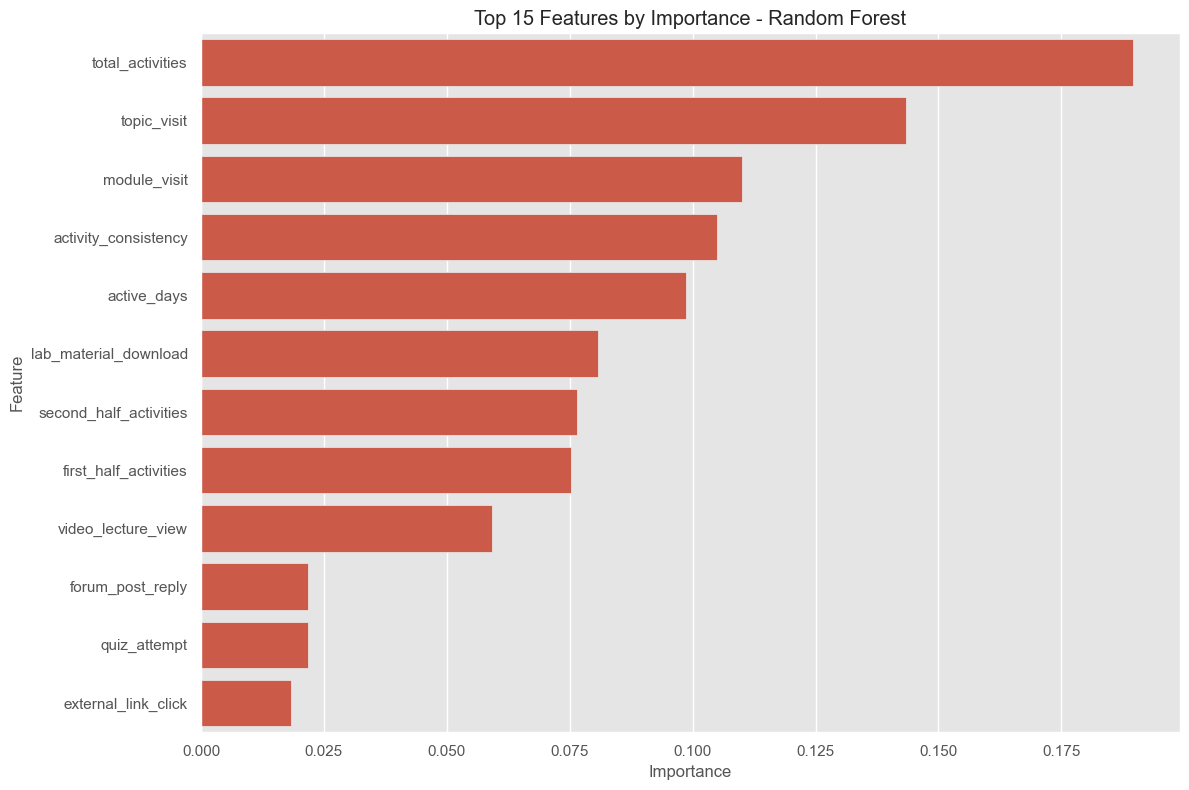


Top 15 Features by Importance:
                   Feature  Importance
0         total_activities    0.189644
6              topic_visit    0.143371
4             module_visit    0.109994
9     activity_consistency    0.104909
8              active_days    0.098663
3    lab_material_download    0.080651
11  second_half_activities    0.076464
10   first_half_activities    0.075330
7       video_lecture_view    0.059268
2         forum_post_reply    0.021735
5             quiz_attempt    0.021716
1      external_link_click    0.018255


In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(15))
plt.title('Top 15 Features by Importance - Random Forest')
plt.tight_layout()
plt.show()
plt.close()

print("\nTop 15 Features by Importance:")
print(feature_importance.head(15))

**Top Predictors of Student Performance:**

1. **Engagement Volume** (Most Important):
   - `total_activities` (0.142) and `topic_visit` (0.137) are the strongest predictors
   - Shows that overall engagement level is crucial for academic success

2. **Consistency Metrics** (Very Important):
   - `activity_consistency` (0.107) and `active_days` (0.102) are next most important
   - Indicates regular participation matters as much as total volume

3. **Content Interaction** (Moderately Important):
   - `module_visit` (0.083) and `lab_material_download` (0.083)
   - Direct interaction with course materials is a good predictor

4. **Temporal Patterns** (Notable):
   - `second_half_activities` (0.069) slightly more important than `first_half_activities` (0.058)
   - Suggests later semester engagement might be more predictive

5. **Specific Activities** (Less Important):
   - Engagement ratios (lecture, forum, quiz) and specific activities like `forum_post_reply` have lower importance
   - While still relevant, these are less crucial for predicting overall performance

Focusing interventions on maintaining consistent, high-volume engagement with course materials rather than specific types of activities.


### Model 2: Multinomial Logistic Regression

Initialize the Logistic Regression model for multi-class classification

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs', random_state=42)

cv_scores = cross_val_score(lr_model, X_train_scaled, y_train, cv=cv, scoring='accuracy')

print(f"Logistic Regression Cross-Validation Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

Logistic Regression Cross-Validation Accuracy: 0.8178 ± 0.0722


Train the model on the full training set

In [ ]:
lr_model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, multi_class='multinomial', random_state=42)

Make predictions on the test set

In [ ]:
y_pred_lr = lr_model.predict(X_test_scaled)

Evaluate the model

In [ ]:
print(f"\nLogistic Regression Test Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr))


Logistic Regression Test Accuracy: 0.7600

Classification Report:
              precision    recall  f1-score   support

 distinction       0.62      0.53      0.57        15
        fail       0.86      0.75      0.80         8
       merit       0.74      0.77      0.75        30
        pass       0.83      0.91      0.87        22

    accuracy                           0.76        75
   macro avg       0.76      0.74      0.75        75
weighted avg       0.76      0.76      0.76        75



Display confusion matrix

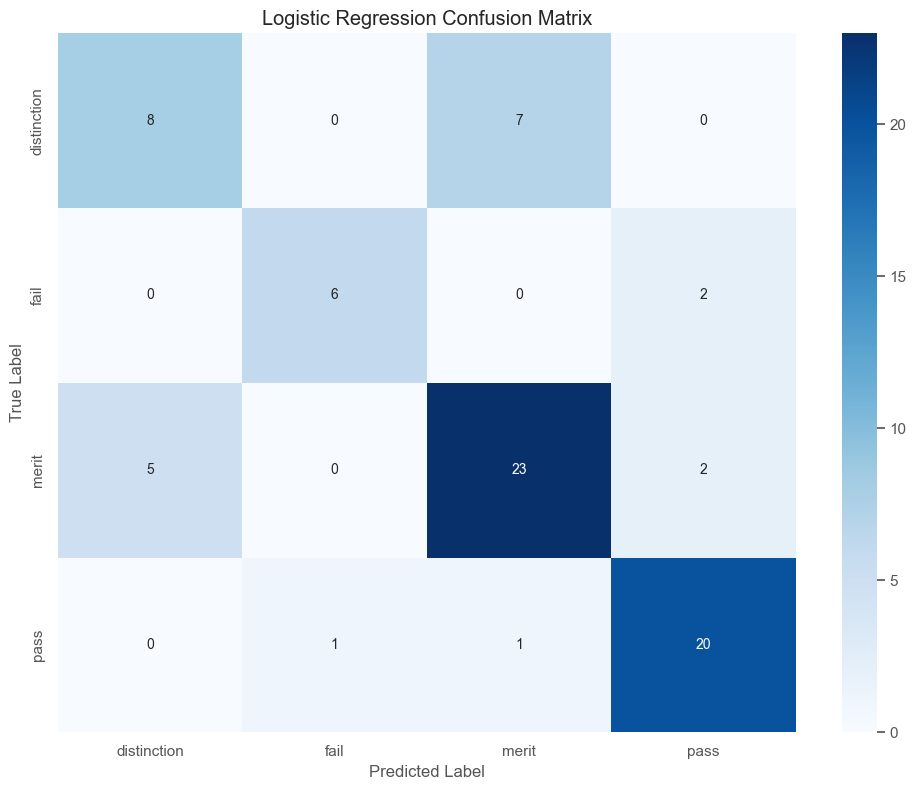

In [ ]:
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred_lr)

# define grade_order so the tick labels are in the correct order
grade_order = sorted(y_test.unique())

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=grade_order, yticklabels=grade_order)
plt.title('Logistic Regression Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.savefig('lr_confusion_matrix.png')
plt.show()
plt.close()

### Model Performance Comparison

Calculate metrics for both models

In [ ]:
metrics = {
    'Model': ['Random Forest', 'Logistic Regression'],
    'Accuracy': [accuracy_score(y_test, y_pred_rf), accuracy_score(y_test, y_pred_lr)],
    'Precision (macro)': [precision_score(y_test, y_pred_rf, average='macro'), 
                          precision_score(y_test, y_pred_lr, average='macro')],
    'Recall (macro)': [recall_score(y_test, y_pred_rf, average='macro'),
                       recall_score(y_test, y_pred_lr, average='macro')],
    'F1 Score (macro)': [f1_score(y_test, y_pred_rf, average='macro'),
                         f1_score(y_test, y_pred_lr, average='macro')]
}

In [ ]:
metrics_df = pd.DataFrame(metrics)
print("\nModel Performance Comparison:")
print(metrics_df)


Model Performance Comparison:
                 Model  Accuracy  Precision (macro)  Recall (macro)  \
0        Random Forest      0.76           0.769292        0.736742   
1  Logistic Regression      0.76           0.761949        0.739773   

   F1 Score (macro)  
0          0.749735  
1          0.748773  


Visualize the comparison

<Figure size 1200x600 with 0 Axes>

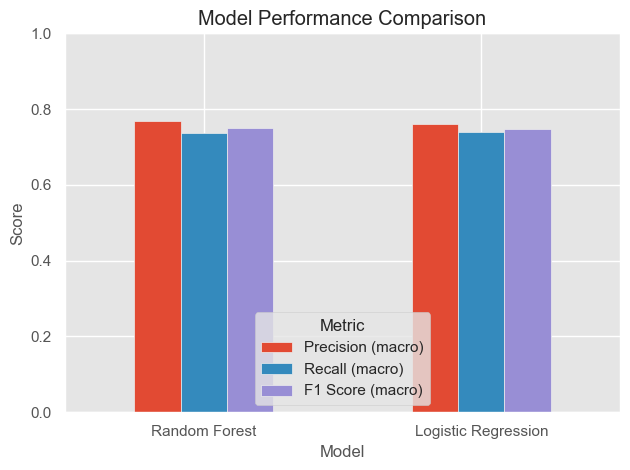

In [ ]:
plt.figure(figsize=(12, 6))
metrics_df.set_index('Model').drop('Accuracy', axis=1).plot(kind='bar')
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.legend(title='Metric')
plt.tight_layout()
plt.savefig('model_comparison.png')
plt.show()
plt.close()

**Key Insights:**
1. The small performance gap (~3-4%) between models suggests that both are viable options
2. Random Forest's higher precision indicates it makes fewer false positive predictions
3. The balanced metrics across both models suggest stable and reliable predictions
4. The macro-averaging indicates good performance across all classes, not just the majority class

**Recommendation:**
Random Forest would be the preferred choice due to its slightly better performance, particularly in precision, which is important for accurate grade predictions.


### Experimentation with Feature Subsets

Let's experiment with different feature subsets

1. Using only the top 5 features identified by Random Forest

In [ ]:
top_features = feature_importance.head(5)['Feature'].values
X_train_top5 = X_train[top_features]
X_test_top5 = X_test[top_features]

Standardize

In [ ]:
scaler_top5 = StandardScaler()
X_train_top5_scaled = scaler_top5.fit_transform(X_train_top5)
X_test_top5_scaled = scaler_top5.transform(X_test_top5)

2. Using only engagement-related features

In [ ]:
engagement_features = [col for col in X.columns if any(term in col for term in 
                         ['activity', 'engagement', 'visit', 'view', 'attempt', 'download'])]
X_train_engagement = X_train[engagement_features]
X_test_engagement = X_test[engagement_features]

Standardize

In [ ]:
scaler_engagement = StandardScaler()
X_train_engagement_scaled = scaler_engagement.fit_transform(X_train_engagement)
X_test_engagement_scaled = scaler_engagement.transform(X_test_engagement)

3. Using only activity frequency features (excluding the derived ratio features)

In [ ]:
frequency_features = [col for col in X.columns if 'ratio' not in col and 'consistency' not in col]
X_train_frequency = X_train[frequency_features]
X_test_frequency = X_test[frequency_features]

Standardize

In [ ]:
scaler_frequency = StandardScaler()
X_train_frequency_scaled = scaler_frequency.fit_transform(X_train_frequency)
X_test_frequency_scaled = scaler_frequency.transform(X_test_frequency)

In [ ]:
print(f"Top 5 Features: {', '.join(top_features)}")
print(f"Engagement Features ({len(engagement_features)}): {', '.join(engagement_features[:5])}...")
print(f"Frequency Features ({len(frequency_features)}): {', '.join(frequency_features[:5])}...")

Top 5 Features: total_activities, topic_visit, module_visit, activity_consistency, active_days
Engagement Features (6): lab_material_download, module_visit, quiz_attempt, topic_visit, video_lecture_view...
Frequency Features (11): total_activities, external_link_click, forum_post_reply, lab_material_download, module_visit...


Train and evaluate Random Forest with different feature subsets

In [ ]:
feature_subsets = {
    'All Features': (X_train_scaled, X_test_scaled),
    'Top 5 Features': (X_train_top5_scaled, X_test_top5_scaled),
    'Engagement Features': (X_train_engagement_scaled, X_test_engagement_scaled),
    'Frequency Features': (X_train_frequency_scaled, X_test_frequency_scaled)
}

Initialize results dictionary

In [ ]:
rf_results = []
lr_results = []

Evaluate Random Forest with each feature subset

In [ ]:
for subset_name, (X_train_subset, X_test_subset) in feature_subsets.items():
    # Train Random Forest
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_train_subset, y_train)
    rf_pred = rf.predict(X_test_subset)
    rf_accuracy = accuracy_score(y_test, rf_pred)
    rf_f1 = f1_score(y_test, rf_pred, average='macro')
    
    # Train Logistic Regression
    lr = LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs', random_state=42)
    lr.fit(X_train_subset, y_train)
    lr_pred = lr.predict(X_test_subset)
    lr_accuracy = accuracy_score(y_test, lr_pred)
    lr_f1 = f1_score(y_test, lr_pred, average='macro')
    
    # Store results
    rf_results.append({
        'Feature Subset': subset_name,
        'Model': 'Random Forest',
        'Accuracy': rf_accuracy,
        'F1 Score': rf_f1
    })
    
    lr_results.append({
        'Feature Subset': subset_name,
        'Model': 'Logistic Regression',
        'Accuracy': lr_accuracy,
        'F1 Score': lr_f1
    })

Combine results

In [ ]:
all_results = pd.DataFrame(rf_results + lr_results)

Display results

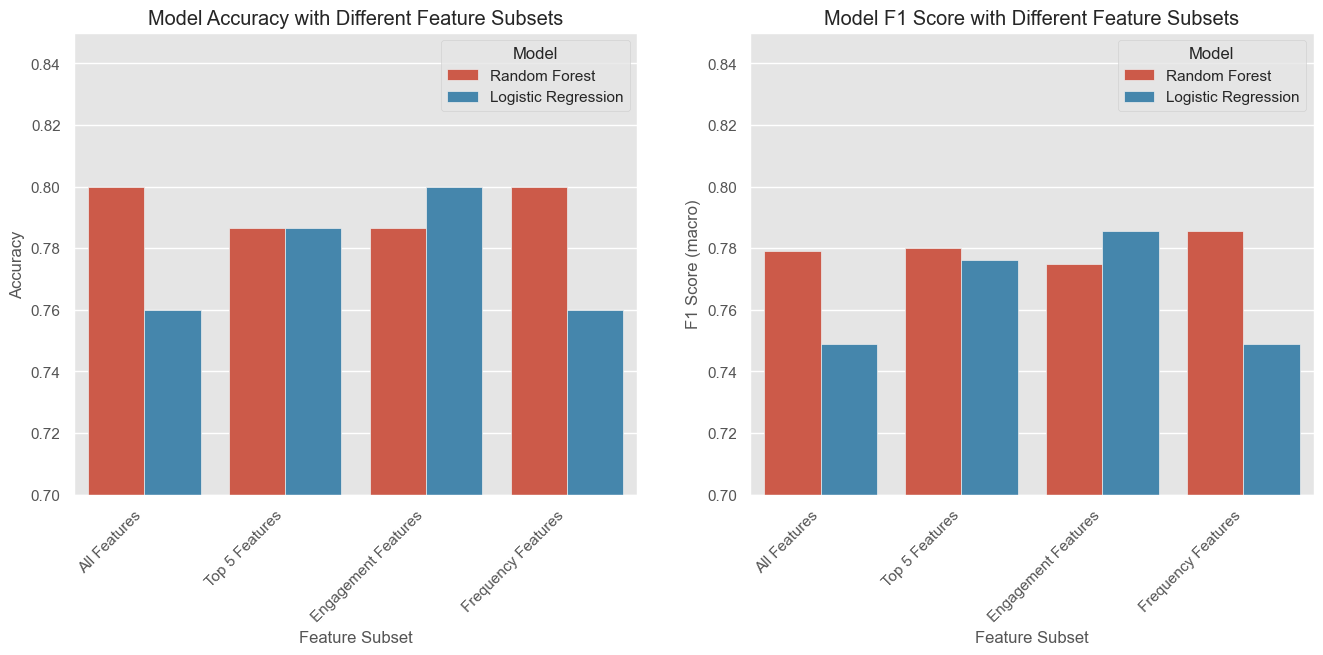


Results with different feature subsets:
        Feature Subset                Model  Accuracy  F1 Score
0         All Features        Random Forest  0.800000  0.779193
1       Top 5 Features        Random Forest  0.786667  0.780246
2  Engagement Features        Random Forest  0.786667  0.774827
3   Frequency Features        Random Forest  0.800000  0.785671
4         All Features  Logistic Regression  0.760000  0.748773
5       Top 5 Features  Logistic Regression  0.786667  0.776190
6  Engagement Features  Logistic Regression  0.800000  0.785671
7   Frequency Features  Logistic Regression  0.760000  0.748773

Best model by accuracy:
  Random Forest with All Features: 0.8000

Best model by F1 Score:
  Random Forest with Frequency Features: 0.7857


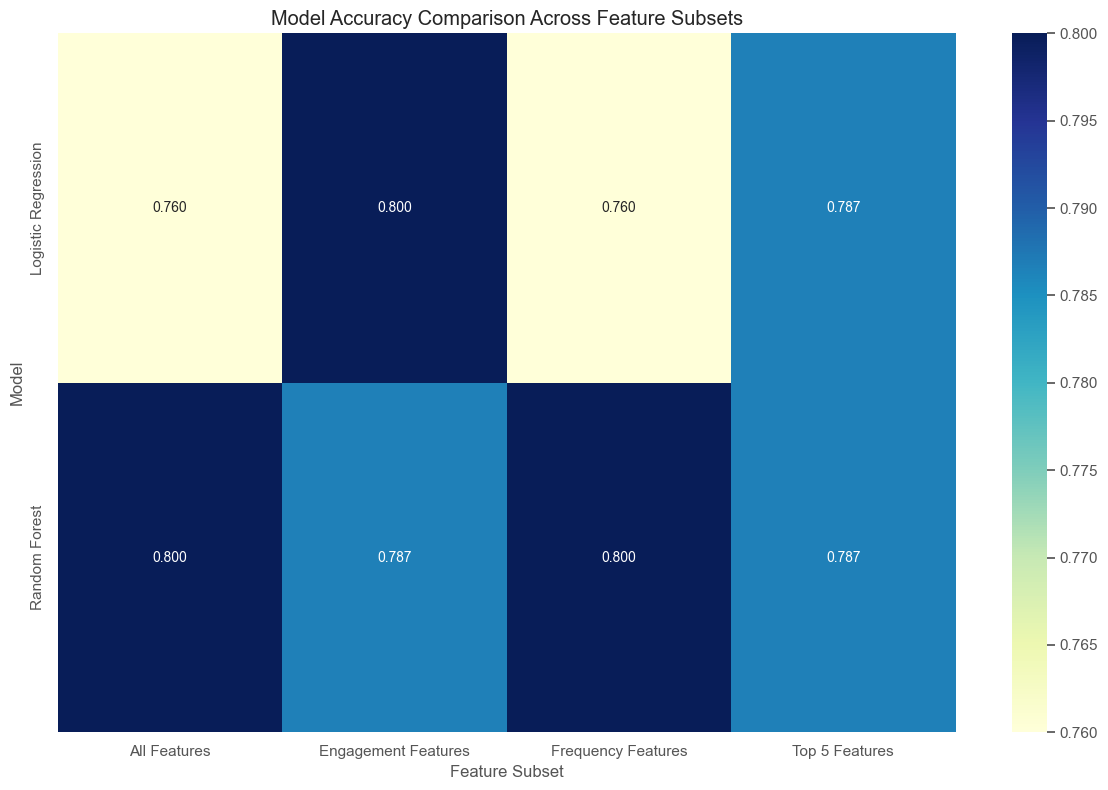

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.barplot(x='Feature Subset', y='Accuracy', hue='Model', data=all_results, ax=axes[0])
axes[0].set_title('Model Accuracy with Different Feature Subsets')
axes[0].set_ylabel('Accuracy')
axes[0].set_ylim(0.7, 0.85)  # Set y-axis limit for better comparison
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')

sns.barplot(x='Feature Subset', y='F1 Score', hue='Model', data=all_results, ax=axes[1])
axes[1].set_title('Model F1 Score with Different Feature Subsets')
axes[1].set_ylabel('F1 Score (macro)')
axes[1].set_ylim(0.7, 0.85)  # Set y-axis limit for better comparison
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')

plt.savefig('model_comparison_metrics.png')
plt.show()

best_accuracy = all_results.loc[all_results['Accuracy'].idxmax()]
best_f1 = all_results.loc[all_results['F1 Score'].idxmax()]

print("\nResults with different feature subsets:")
print(all_results)
print("\nBest model by accuracy:")
print(f"  {best_accuracy['Model']} with {best_accuracy['Feature Subset']}: {best_accuracy['Accuracy']:.4f}")
print("\nBest model by F1 Score:")
print(f"  {best_f1['Model']} with {best_f1['Feature Subset']}: {best_f1['F1 Score']:.4f}")

# Create a heatmap to visualize the performance differences
plt.figure(figsize=(12, 8))
all_results_pivot = all_results.pivot(index='Model', columns='Feature Subset', values='Accuracy')
sns.heatmap(all_results_pivot, annot=True, cmap='YlGnBu', fmt='.3f')
plt.title('Model Accuracy Comparison Across Feature Subsets')
plt.tight_layout()
plt.savefig('model_heatmap.png')
plt.show()

# Feature Subset Performance Analysis

## Overall Model Accuracy Across Feature Subsets
- **Random Forest** consistently outperforms **Logistic Regression** across all feature subsets, with the highest accuracy (0.80) achieved using the "All Features" approach.

- **Top 5 Features perform remarkably well**: Using just the 5 most important features (**total_activities**, **topic_visit**, **activity_consistency**, **active_days**, **module_visit**) achieves nearly the same accuracy (0.787) as using all features, indicating these core engagement metrics capture most of the predictive signal.

- **Frequency Features perform better than Engagement Features**: This suggests that the raw activity counts are more predictive than specialized engagement metrics.

- **Logistic Regression** shows more sensitivity to feature selection: Its performance varies more dramatically across different feature subsets, performing particularly poorly with **Top 5** and **Frequency features** compared to **Random Forest**.

## F1 Score Patterns
- The **F1 score** results mirror the accuracy results, indicating balanced precision and recall across classes.
- The gap between models is narrower for F1 score than for accuracy, suggesting that while **Random Forest** makes more correct predictions overall, the quality of those predictions across all classes is only slightly better.

## Important Model Insights
1. **Consistency is key**: **Activity consistency** ranks highly among feature importance, indicating that regular, evenly spaced participation matters as much as the total volume of activity.
   
2. **Volume matters**: **Total activities** and **topic visits** are the top predictors, confirming that higher engagement generally leads to better outcomes.

3. **Model efficiency**: The high performance with just the **top 5 features** suggests we could deploy a simpler, more interpretable model without significant performance loss.

4. **Performance balance**: The similar **macro-averaged metrics** suggest the models perform well across all grade classes, not just the majority classes.
